**Make a square lattice and generate a set of random numbers at each lattice points and then perform metropolis algorithm and check the probabilities**

In [9]:
#load the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import time as t
from tqdm import tqdm

Probability is: $p(\epsilon_i) = e^{-\beta \epsilon_i}$ where $\epsilon_i$ is the energy of the ith microstate. In this case, while we are changing the position of a random spin, we are entering a new microstate. If this new microstate has a higher probability with respect to the older probability, then this new microstate is chosen and changes are brought to it accordingly.

1. Establish an initial state with energy Eb by positioning yourself at a random configuration in the
lattice

2.  Change the initial configuration by flipping e.g., one spin only. Compute the energy of this trial
state Et.

3. Calculate ∆E = Et − Eb. The number of values ∆E is limited to five for the Ising model in two
dimensions, see the discussion below.

4. If ∆E ≤ 0 we accept the new configuration, meaning that the energy is lowered and we are
hopefully moving towards the energy minimum at a given temperature. Go to step 7.

5. If ∆E > 0, calculate w = e−(β∆E).

6. Compare w with a random number r. If
r ≤ w,
then accept the new configuration, else we keep the old configuration.

7. The next step is to update various expectations values.

8. The steps (2)-(7) are then repeated in order to obtain a sufficently good representation of states.

9. Each time you sweep through the lattice, i.e., when you have summed over all spins, constitutes
what is called a Monte Carlo cycle. You could think of one such cycle as a measurement. At the
end, you should divide the various expectation values with the total number of cycles. You can
choose whether you wish to divide by the number of spins or not. If you divide with the number
of spins as well, your result for e.g., the energy is now the energy per spin.

.   .   .   .   .   .   .
.   .   .   A   .   .   .
.   .   B   X   C   .   .
.   .   .   D   .   .   .
.   .   .   .   .   .   .
.   .   .   .   .   .   .   (Open the markdown in edit mode to understand!)
.   .   .   .   .   .   .

X only interacts with A,B,C, and D. Therefore, we need to browse through all the atoms and take the sum of their interaction with their nearest neighbours.

# Implementation of Free ends condition

In this condition, the ends of the lattice are free and are not connected to any other nearby atoms. These are open ended lattices.

In [61]:
def grid_maker(nrows,ncols):
  '''
  This function generates a random classical grid of any size

  Parameters:

  - nrows: (integer) Specify the number of rows
  - ncols: (integer) Specify the number of columns

  Returns:

  The function returns your desired random grid of any size.

  '''
  if not isinstance(nrows, int) or nrows <= 0:
    raise ValueError("nrows must be a positive integer")
  if not isinstance(ncols, int) or ncols <= 0:
    raise ValueError("nrows must be a positive integer")

  grid_points = np.zeros((nrows,ncols))

  for i in range(nrows):
    for j in range(ncols):
      grid_points[i,j] = rn.choice([-1,1])

  return grid_points

In [62]:
def compute_energy(grid):
    """
    This function calculates the energy of a 2D lattice with classical spins
    (Implements free ends condition).

    Parameters:
    - grid: input a 2D grid

    Returns:
    - Energy of the lattice
    """
    energy = 0
    nrows, ncols = grid.shape

    for k in range(nrows):
        for l in range(ncols):
            for dk, dl in [[0, -1], [0, 1], [-1, 0], [1, 0]]:
                ni, nj = k + dk, l + dl
                if 0 <= ni < nrows and 0 <= nj < ncols:  # Free ends condition
                    energy += -grid[k, l] * grid[ni, nj]

    return energy / 2


In [63]:
grid_points = grid_maker(10,10)

******************************************************
Implementing Metropolis Hasting at  5.0 K
****************************************************** 



Configurations sampled: 100%|██████████| 10000/10000 [00:02<00:00, 4111.29samples/s]


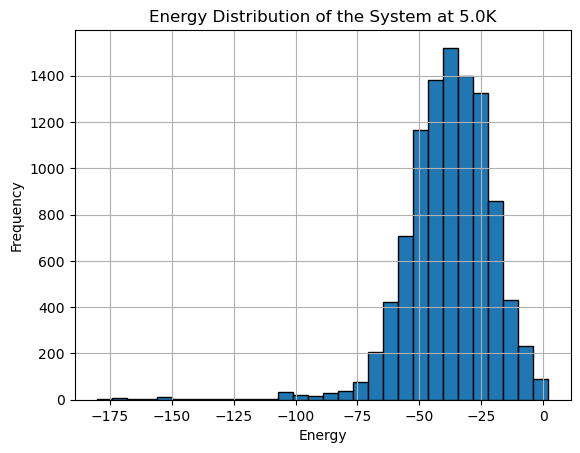

In [66]:
nsamples = int(input("enter the number of samples you want to measure."))

while True:

    temperature = float(input("Enter the temperature of the system at which your material is."))

    if temperature <= 0:

        print("******************************************************")
        print("Sorry, Temperature selection cannot be negative or zero. Try again!")
        print("****************************************************** \n")

    else:

        print("******************************************************")
        print("Implementing Metropolis Hasting at ",temperature,"K")
        print("****************************************************** \n")

        break

saved_energies = []
nrows, ncols = grid_points.shape

for n in tqdm(range(nsamples), desc='Configurations sampled', unit='samples'):

    i = np.random.randint(0,nrows)
    j = np.random.randint(0,ncols)
    temp_grid = np.copy(grid_points)
    temp_grid[i,j] = -temp_grid[i,j]

    energy = compute_energy(grid_points)
    temp_energy = compute_energy(temp_grid)

    energy_diff = temp_energy - energy

    p_acceptance = np.exp(-energy_diff/temperature)

    if energy_diff < 0:

        grid_points[i,j] = -grid_points[i,j]
        saved_energies.append(temp_energy)

    else:

        if np.random.rand() < p_acceptance:

            grid_points[i,j] = -grid_points[i,j]
            saved_energies.append(temp_energy)

        else:

            saved_energies.append(energy)

#Plot the Probability distribution

plt.hist(saved_energies, bins=30, edgecolor = 'k')
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.title(f"Energy Distribution of the System at {temperature}K")
plt.grid()

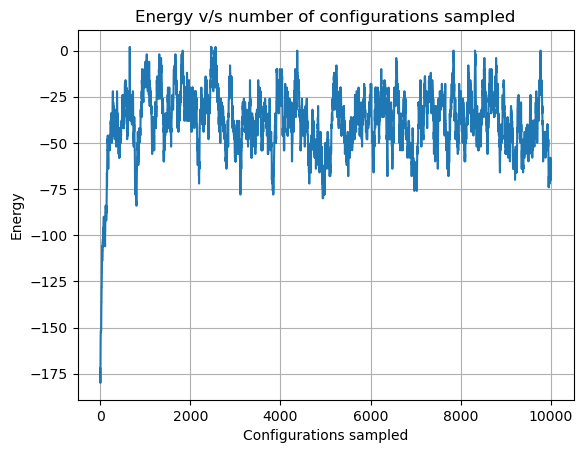

In [67]:
#Thermalization check
plt.plot(saved_energies)
plt.xlabel("Configurations sampled")
plt.ylabel("Energy")
plt.title("Energy v/s number of configurations sampled")
plt.grid()

In [68]:
def ising_model(nsamples, temperature, grid_points):
    """
    This function runs the Ising model simulation using Metropolis-Hastings.
    (Implements free ends condition)

    Parameters:
    - nsamples: Number of samples to be taken.
    - temperature: Temperature at which the system is simulated.
    - grid_points: Takes a grid of any size.

    Returns:
    - saved_energies: List of sampled energies by burning the first 20% of the sampled energies.
    - grid_points: The final grid after simulation.
    """
    if temperature <= 0:
        raise ValueError("Temperature must be positive.")

    saved_energies = []

    nrows, ncols = grid_points.shape

    for n in range(nsamples):
        i, j = np.random.randint(0, nrows), np.random.randint(0, ncols)
        temp_grid = np.copy(grid_points)
        temp_grid[i, j] = -temp_grid[i, j]

        energy = compute_energy(grid_points)
        temp_energy = compute_energy(temp_grid)
        energy_diff = temp_energy - energy

        p_acceptance = np.exp(-energy_diff / temperature) if temperature > 0 else 0

        if energy_diff < 0 or np.random.rand() < p_acceptance:
            grid_points[i, j] = -grid_points[i, j]
            saved_energies.append(temp_energy)
        else:
            saved_energies.append(energy)

    return saved_energies[int(nsamples/5):], grid_points


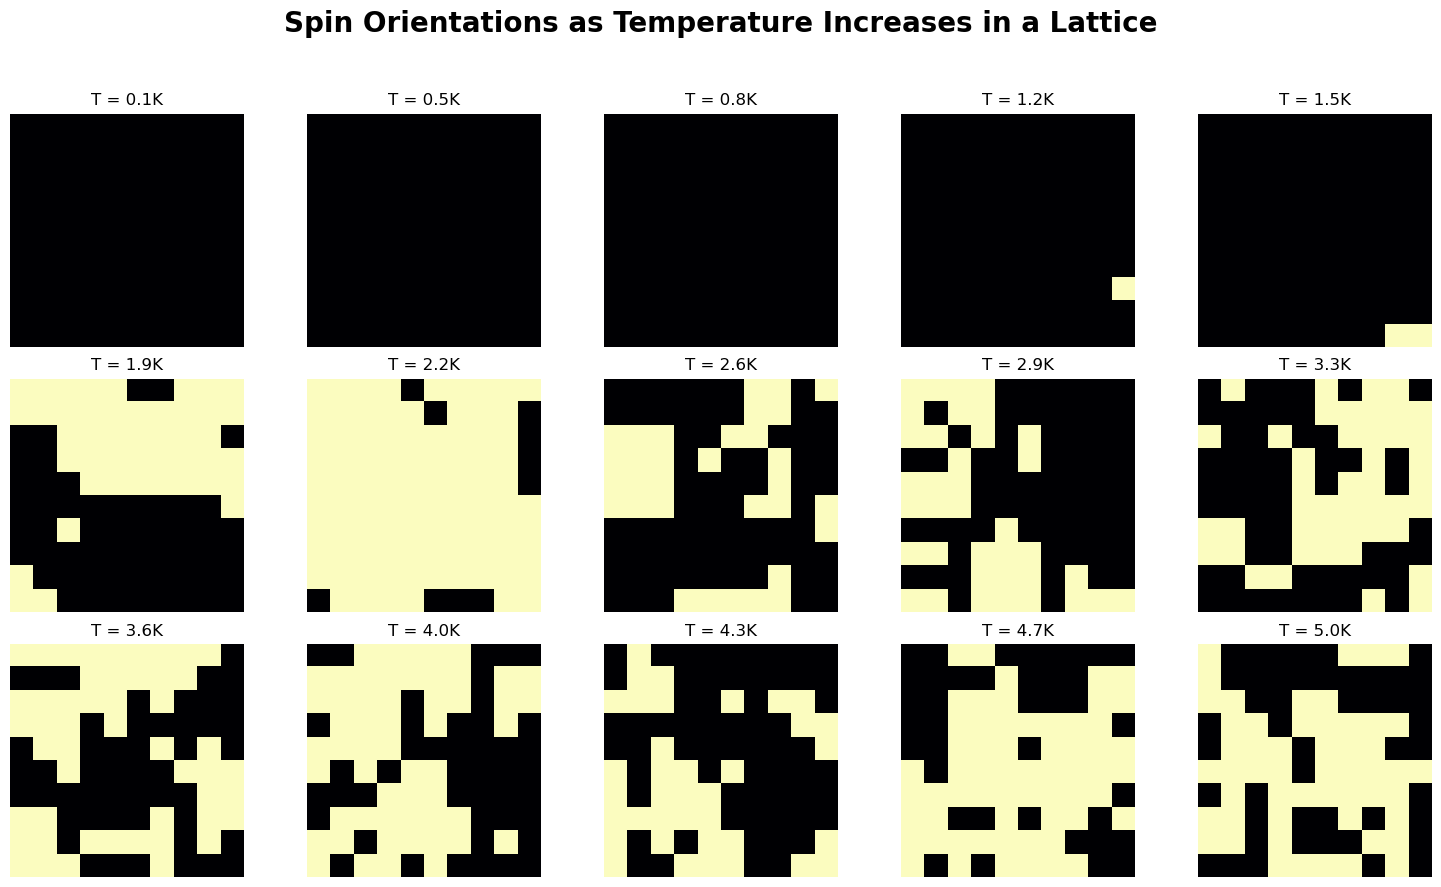

In [69]:
temp_range = np.linspace(0.1, 5, 15)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))

for idx, temp in enumerate(temp_range):
    energy, grid = ising_model(nsamples, temperature=temp, grid_points=grid_points)

    ax = axes[idx // 5, idx % 5]
    ax.imshow(grid, cmap="magma")
    ax.set_title(f"T = {temp:.1f}K", fontsize=12)
    ax.axis("off")

fig.suptitle("Spin Orientations as Temperature Increases in a Lattice", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

We can see that large scale magnetic domains are being created at temperatures less than 2.6K. Therefore, the phase transition is occuring somewhere near 2.6K.

 ## Calculating the specific heat capacity at the constant volume

 The specific heat of a lattice can be obtained as follows: $C_V = \frac{\langle E^2 \rangle - \langle E \rangle^2}{k_B T^2}$. In this case, we will assume $K_B$ to be 1.

In [70]:
def specific_heat(grid, temp_range, nsamples=10000):
    '''
    This function calculates and gives a list of specific heat for a lattice across a given temperature range
    (Implements free ends condition)

    NOTE: Function returns 2 lists. Use 2 variables while calling the function.

    Parameters taken:

    - grid: Takes a 2D grid of any size.
    - temp_range: Takes a list of temperatures for which Cv is to be calculated.
    - nsamples: How many times would you like to sample the configuration at a given temperature
                (default is 10000).
    Returns:

    - Cv: Gives the original calculated specific heat
    - updated_Cv: Gives the updated specific heat with removed NaN values if any.
    '''

    energy_collections = []  #collects the saved energies from the function ising_model_free for each temperature

    print("******************************************************")
    print("Collecting energies. Kindly wait.")
    print("****************************************************** \n")

    for t in tqdm(temp_range, desc='collecting energies', unit='iterations'):
        energy, grid = ising_model(nsamples, temperature=t, grid_points=grid)
        energy_collections.append(energy)

    print("******************************************************")
    print("Energy collection completed! Calculating Cv now.")
    print("****************************************************** \n")

    Cv = []
    for t in tqdm(temp_range, desc='temperature sampled', unit='samples'):
        weighted_en = 0
        weighted_sq = 0
        partition_function = 0

        for i in energy_collections:
            for j in i:
                exp_factor = np.exp(-j / t)
                weighted_en += j * exp_factor
                weighted_sq += j**2 * exp_factor
                partition_function += exp_factor

        if partition_function == 0:
            Cv.append(np.nan)
            continue

        mean_en = weighted_en / partition_function
        mean_sq = weighted_sq / partition_function
        Cv.append((mean_sq - mean_en**2) / t**2)

    print("******************************************************")
    print("Cv has been calculated. Refining it to remove NaN values now.")
    print("****************************************************** \n")

    updated_Cv = []
    for i in Cv:
        if np.isnan(i):
            continue
        else:
            updated_Cv.append(i)

    print("******************************************************")
    print("Your results are ready!")
    print("****************************************************** \n")

    return Cv, updated_Cv


In [71]:
def specific_heat_LSF(grid, temp_range, nsamples=10000):
    """
    This function calculates and gives a list of specific heat for a lattice across a given temperature range
    (Implements free ends condition with less statistical fluctuations)

    NOTE: Function returns 2 lists. Use 2 variables while calling the function.
    Parameters:
    - grid: Initial 2D Ising spin configuration.
    - temp_range: List of temperatures.
    - nsamples: Number of Monte Carlo samples per temperature.

    Returns:
    - Cv: List of specific heat values.
    - updated_Cv: Filtered Cv list without NaN values.
    """
    energy_collections = []

    print("******************************************************")
    print("Collecting energies. Kindly wait.")
    print("****************************************************** \n")

    for t in tqdm(temp_range, desc='collecting energies', unit='iterations'):
        energy, _ = ising_model(nsamples, temperature=t, grid_points=grid)
        energy_collections.append(energy)

    print("******************************************************")
    print("Energy collection completed! Calculating Cv now.")
    print("****************************************************** \n")

    Cv = []
    for t, energies in zip(temp_range, energy_collections):
        var_energy = np.var(energies)
        Cv.append(var_energy / (t**2))

    print("******************************************************")
    print("Cv has been calculated. Refining it to remove NaN values now.")
    print("****************************************************** \n")

    updated_Cv = [c for c in Cv if not np.isnan(c)]

    print("******************************************************")
    print("Your results are ready!")
    print("****************************************************** \n")

    return Cv, updated_Cv

In [77]:
temp_range = np.linspace(0.1,5,200)
grid_points = grid_maker(10,10)
grid_points1 = grid_maker(15,15)
Cv, updated_Cv = specific_heat_LSF(grid_points, temp_range)
Cv1, updated_Cv1 = specific_heat_LSF(grid_points1, temp_range)

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [08:00<00:00,  2.40s/iterations]


******************************************************
Energy collection completed! Calculating Cv now.
****************************************************** 

******************************************************
Cv has been calculated. Refining it to remove NaN values now.
****************************************************** 

******************************************************
Your results are ready!
****************************************************** 

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [18:07<00:00,  5.44s/iterations]

******************************************************
Energy collection completed! Calculating Cv now.
****************************************************** 

******************************************************
Cv has been calculated. Refining it to remove NaN values now.
****************************************************** 

******************************************************
Your results are ready!
****************************************************** 



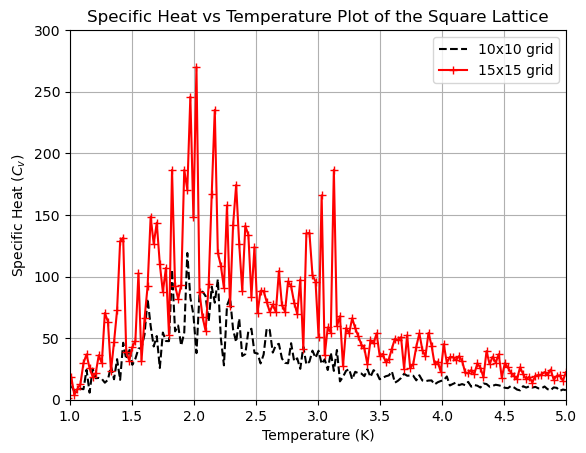

In [87]:
plt.plot(temp_range, Cv, 'k--', label='10x10 grid')
plt.plot(temp_range, Cv1, 'r-+', label='15x15 grid')
plt.xlabel("Temperature (K)")
plt.ylabel(r"Specific Heat ($C_v$)")
plt.title("Specific Heat vs Temperature Plot of the Square Lattice")
plt.ylim(0,300)
plt.xlim(1,5)
plt.grid()
plt.legend()
plt.show()

Spurious effects are seen at lower temperatures for free ends conditions. 

# Calculating the Mean energy v/s Temperature for the square lattice

The mean energy of a system in thermal equilibrium is given by:


$\langle E \rangle = \frac{\sum_i E_i e^{-E_i / k_B T}}{Z}$


where the partition function is

$Z = \sum_i e^{-E_i / k_B T}$


In [88]:
def mean_energy(grid, temp_range, nsamples=10000):
    '''
    This function calculates and gives a list of mean energy for a lattice across a given temperature range
    (Implements free ends condition)

    Parameters taken:

    - grid: Takes a 2D grid of any size.
    - temp_range: Takes a list of temperatures for which mean energy is to be calculated.
    - nsamples: How many times would you like to sample the configuration at a given temperature
                (default is 10000).
    Returns:

    - mean_energies: A list of calculated mean energy.
    '''
    energy_collections = []
    nrows, ncols = grid.shape
    grid = grid
    print("******************************************************")
    print("Collecting energies. Kindly wait.")
    print("****************************************************** \n")

    for t in tqdm(temp_range, desc='collecting energies', unit='temperature'):
        energy, grid = ising_model(nsamples, temperature=t, grid_points=grid)
        energy_collections.append(energy)

    mean_energies = []

    print("******************************************************")
    print("Energy collection completed! Calculating mean energy now.")
    print("****************************************************** \n")

    for i in tqdm(energy_collections, desc='calculating mean energy', unit='energy sample'):
        weighted_en = 0
        partition_func = 0
        for j in i:
            weighted_en += j * np.exp(-j / t)
            partition_func += np.exp(-j / t)

        if partition_func == 0:
            mean_energies.append(np.nan)
        else:
            mean_energies.append(weighted_en / partition_func)

    print("******************************************************")
    print("Your results are ready!")
    print("****************************************************** \n")

    return mean_energies


In [89]:
def mean_energy_LSF(grid, temp_range, nsamples=10000):
    '''
    This function calculates and gives a list of mean energy for a lattice across a given temperature range
    (Implements free ends condition with less statistical fluctuations)

    Parameters taken:

    - grid: Takes a 2D grid of any size.
    - temp_range: Takes a list of temperatures for which mean energy is to be calculated.
    - nsamples: How many times would you like to sample the configuration at a given temperature
                (default is 10000).
    Returns:

    - mean_energies: A list of calculated mean energy.
    '''
    energy_collections = []
    nrows, ncols = grid.shape
    grid = grid
    print("******************************************************")
    print("Collecting energies. Kindly wait.")
    print("****************************************************** \n")

    for t in tqdm(temp_range, desc='collecting energies', unit='temperature'):
        energy, grid = ising_model(nsamples, temperature=t, grid_points=grid)
        energy_collections.append(energy)

    mean_energies = []

    print("******************************************************")
    print("Energy collection completed! Calculating mean energy now.")
    print("****************************************************** \n")

    for i in tqdm(energy_collections, desc='calculating mean energy', unit='energy sample'):
        mean_energies.append(np.mean(i))

    print("******************************************************")
    print("Your results are ready!")
    print("****************************************************** \n")

    return mean_energies


In [90]:
grid_points = grid_maker(10,10)
grid_points1 = grid_maker(15,15)
mean_energies  = mean_energy_LSF(grid_points, temp_range)
mean_energies1 = mean_energy_LSF(grid_points1, temp_range=temp_range)

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [08:00<00:00,  2.40s/temperature]


******************************************************
Energy collection completed! Calculating mean energy now.
****************************************************** 



calculating mean energy: 100%|██████████| 200/200 [00:00<00:00, 2961.19energy sample/s]


******************************************************
Your results are ready!
****************************************************** 

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [18:04<00:00,  5.42s/temperature]


******************************************************
Energy collection completed! Calculating mean energy now.
****************************************************** 



calculating mean energy: 100%|██████████| 200/200 [00:00<00:00, 2980.05energy sample/s]

******************************************************
Your results are ready!
****************************************************** 



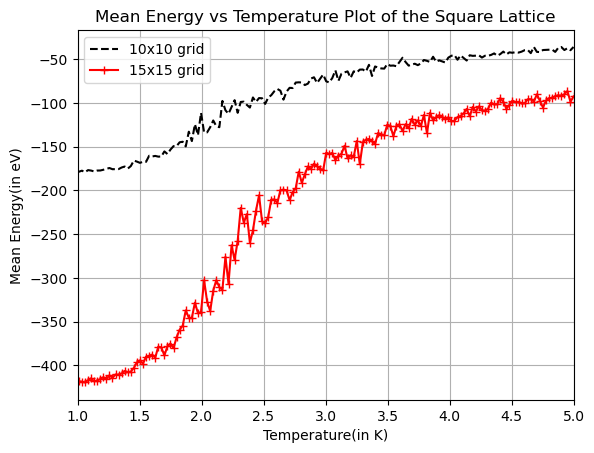

In [122]:
plt.plot(temp_range, mean_energies, 'k--', label='10x10 grid')
plt.plot(temp_range, mean_energies1, 'r-+', label='15x15 grid')
plt.title(r"Mean Energy vs Temperature Plot of the Square Lattice")
plt.xlabel("Temperature(in K)")
plt.ylabel("Mean Energy(in eV)")
plt.xlim(1,5)
plt.grid()
plt.legend()

# Finding susceptibility for a square lattice

Magnetization of a lattice is just the sum of all the spin orientation at each of the lattice points.

$\langle M \rangle = \frac{\sum_i M_i e^{-E_i / k_B T}}{Z}$


In [92]:
def magnetize(grid, temp_range, nsamples=10000):
    '''
    This function calculates and gives a list of magnetization for a lattice across a given temperature range
    (Implements free ends condition)

    Parameters:

    - grid: Takes a 2D grid of any size
    - temp_range: Takes a list of temperature for which magnetic susceptibility is to be calculated
    - nsamples: How many times would you like to sample the configuration at a given temperature
                (default is 10000).
    Returns:

    - magnetization: A list of magnetization values across all temperatures.
    '''
    magnetization = []
    nrows, ncols = grid.shape
    N = nrows * ncols

    for t in tqdm(temp_range, desc='collecting magnetization', unit='temperature'):
        energy, grid = ising_model(nsamples=10000, temperature=t, grid_points=grid)
        magnetization.append(np.abs(np.sum(grid)) / N)

    return magnetization


In [108]:
grid_points = grid_maker(10,10)
grid_points1 = grid_maker(15,15)
magnetization = magnetize(grid_points, temp_range)
magnetization1 = magnetize(grid_points1,temp_range)

collecting magnetization: 100%|██████████| 200/200 [18:17<00:00,  5.49s/temperature]


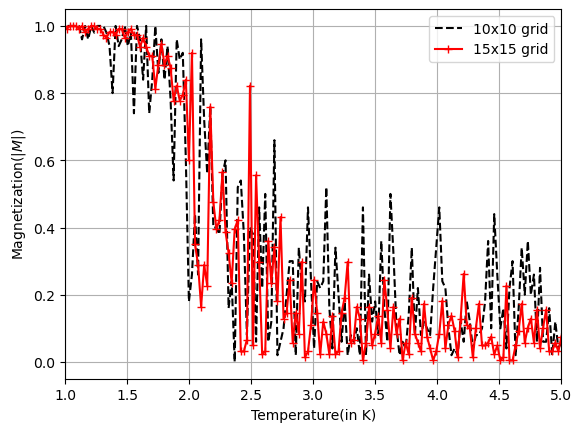

In [121]:
plt.plot(temp_range, magnetization, 'k--', label='10x10 grid')
plt.plot(temp_range, magnetization1, 'r-+', label='15x15 grid')
plt.xlabel("Temperature(in K)")
plt.ylabel(r"Magnetization($|M|$)")
plt.grid()
plt.xlim(1,5)
plt.legend()

Magnetic susceptibility is obtained as the variance of the magnetization of the lattice at each of the temperature, divided by the corresponding temperature. This is why we need to call the ising model function carefully. We will be calling the ising model function multiple times with nsamples 1 such that we will get an ensemble of lattices for a particular temperature from which variance of magnetization can be obtained at a particular temperature.

$\chi = \frac{\langle M^2 \rangle - \langle M \rangle^2}{k_B T}$

In [95]:
def mag_susceptibility(grid, temp_range):
    '''
    This function calculates the magnetic susceptibility for a lattice across a given temperature range.

    Parameters:
    - grid: Takes a 2D grid of any size.
    - temp_range: A list of temperatures at which susceptibility is calculated.

    Returns:
    - A list of calculated magnetic susceptibilities.
    '''
    
    susceptibility_values = []
    
    print("******************************************************")
    print("Collecting magnetization data. Kindly wait.")
    print("****************************************************** \n")
    
    for T in tqdm(temp_range, desc="Processing temperatures", unit="temperature"):
        magnetizations = []

        for _ in range(10000):  
            _, grid = ising_model(nsamples=1, temperature=T, grid_points=grid)  
            magnetization = np.sum(grid)
            magnetizations.append(magnetization)
    
        mean_M = np.mean(magnetizations)
        mean_M2 = np.mean(np.square(magnetizations))
        chi = (mean_M2 - mean_M**2) / T
        susceptibility_values.append(chi)

    print("******************************************************")
    print("Magnetic susceptibility calculation completed!")
    print("****************************************************** \n")
    return susceptibility_values    

In [96]:
X = mag_susceptibility(grid_points, temp_range)
X1 = mag_susceptibility(grid_points1,temp_range)

******************************************************
****************************************************** 



Processing temperatures: 100%|██████████| 200/200 [08:21<00:00,  2.51s/temperature]


******************************************************
Magnetic susceptibility calculation completed!
****************************************************** 

******************************************************
****************************************************** 



Processing temperatures: 100%|██████████| 200/200 [18:42<00:00,  5.61s/temperature]

******************************************************
Magnetic susceptibility calculation completed!
****************************************************** 



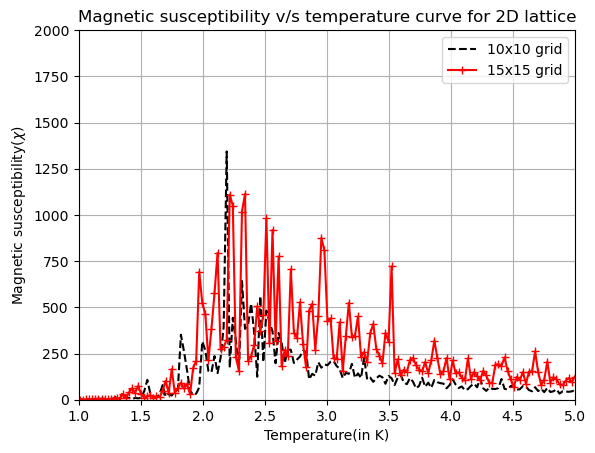

In [107]:
plt.plot(temp_range, X, 'k--', label='10x10 grid')
plt.plot(temp_range, X1, 'r-+', label='15x15 grid')
plt.xlabel("Temperature(in K)")
plt.ylabel(r"Magnetic susceptibility($\chi$)")
plt.title("Magnetic susceptibility v/s temperature curve for 2D lattice")
plt.grid()
plt.xlim(1,5)
plt.ylim(0,2000)
plt.legend()

# Introducing Periodic Boundary Conditions 

In this boundary condition, the ends of the lattices are joined or wrapped together in order to make the lattice complete and not open ended.

In [98]:
def compute_energy_PBC(grid):
    """
    This function calculates the energy of a 2D lattice with classical spins
    (Implements periodic boundary conditions).

    Parameters:
    - grid: input a 2D grid

    Returns:
    - Energy of the lattice
    """
    energy = 0
    nrows, ncols = grid.shape

    for k in range(nrows):
        for l in range(ncols):
            for dk, dl in [[0, -1], [0, 1], [-1, 0], [1, 0]]:
                ni, nj = (k + dk) % nrows, (l + dl) % ncols #implementation of periodic boundary conditions
                energy += -grid[k, l] * grid[ni, nj]

    return energy / 2


In [99]:
def ising_model_PBC(nsamples, temperature, grid_points):
    """
    This function runs the Ising model simulation using Metropolis-Hastings.
    (Implements periodic boundary conditions)

    Parameters:
    - nsamples: Number of samples to be taken.
    - temperature: Temperature at which the system is simulated.
    - grid_points: Takes a grid of any size.

    Returns:
    - saved_energies: List of sampled energies by burning the first 20% of the sampled energies.
    - grid_points: The final grid after simulation.
    """
    if temperature <= 0:
        raise ValueError("Temperature must be positive.")

    saved_energies = []

    nrows = grid_points.shape[0]
    ncols = grid_points.shape[1]

    for n in range(nsamples):
        i, j = np.random.randint(0, nrows), np.random.randint(0, ncols)
        temp_grid = np.copy(grid_points)
        temp_grid[i, j] = -temp_grid[i, j]

        energy = compute_energy_PBC(grid_points)
        temp_energy = compute_energy_PBC(temp_grid)
        energy_diff = temp_energy - energy

        p_acceptance = np.exp(-energy_diff / temperature) if temperature > 0 else 0

        if energy_diff < 0 or np.random.rand() < p_acceptance:
            grid_points[i, j] = -grid_points[i, j]
            saved_energies.append(temp_energy)
        else:
            saved_energies.append(energy)

    return saved_energies[int(nsamples/5):], grid_points


In [100]:
def specific_heat_PBC(grid, temp_range, nsamples=10000):
    """
    Computes specific heat over a range of temperatures.
    (Implements Periodic Boundary Conditions)

    Parameters:
    - grid: Initial 2D Ising spin configuration.
    - temp_range: List of temperatures.
    - nsamples: Number of Monte Carlo samples per temperature.

    Returns:
    - Cv: List of specific heat values.
    - updated_Cv: Filtered Cv list without NaN values.
    """
    energy_collections = []

    print("******************************************************")
    print("Collecting energies. Kindly wait.")
    print("****************************************************** \n")

    for t in tqdm(temp_range, desc='collecting energies', unit='iterations'):
        energy, _ = ising_model_PBC(nsamples, temperature=t, grid_points=grid)
        energy_collections.append(energy)

    print("******************************************************")
    print("Energy collection completed! Calculating Cv now.")
    print("****************************************************** \n")

    Cv = []
    for t, energies in zip(temp_range, energy_collections):
        var_energy = np.var(energies)
        Cv.append(var_energy / (t**2))

    print("******************************************************")
    print("Cv has been calculated. Refining it to remove NaN values now.")
    print("****************************************************** \n")

    updated_Cv = [c for c in Cv if not np.isnan(c)]

    print("******************************************************")
    print("Your results are ready!")
    print("****************************************************** \n")

    return Cv, updated_Cv

In [101]:
def mean_energy_PBC(grid, temp_range, nsamples=10000):
    '''
    This function calculates and gives a list of mean energy for a lattice across a given temperature range
    (Implements periodic boundary conditions)

    Parameters taken:

    - grid: Takes a 2D grid of any size.
    - temp_range: Takes a list of temperatures for which mean energy is to be calculated.
    - nsamples: How many times would you like to sample the configuration at a given temperature
                (default is 10000).
    Returns:

    - mean_energies: A list of calculated mean energy.
    '''
    energy_collections = []
    nrows, ncols = grid.shape
    grid = grid
    print("******************************************************")
    print("Collecting energies. Kindly wait.")
    print("****************************************************** \n")

    for t in tqdm(temp_range, desc='collecting energies', unit='temperature'):
        energy, grid = ising_model_PBC(nsamples, temperature=t, grid_points=grid)
        energy_collections.append(energy)

    mean_energies = []

    print("******************************************************")
    print("Energy collection completed! Calculating mean energy now.")
    print("****************************************************** \n")

    for i in tqdm(energy_collections, desc='calculating mean energy', unit='energy sample'):
        mean_energies.append(np.mean(i))

    print("******************************************************")
    print("Your results are ready!")
    print("****************************************************** \n")

    return mean_energies


In [102]:
def magnetize_PBC(grid, temp_range, nsamples=10000):
    '''
    This function calculates and gives a list of magnetization for a lattice across a given temperature range
    (Implements periodic boundary conditions)

    Parameters:

    - grid: Takes a 2D grid of any size
    - temp_range: Takes a list of temperature for which magnetic susceptibility is to be calculated
    - nsamples: How many times would you like to sample the configuration at a given temperature
                (default is 10000).
    Returns:

    - magnetization: A list of magnetization values across all temperatures.
    '''
    magnetization = []
    nrows, ncols = grid.shape
    N = nrows * ncols

    for t in tqdm(temp_range, desc='collecting magnetization', unit='temperature'):
        energy, grid = ising_model_PBC(nsamples, temperature=t, grid_points=grid)
        magnetization.append(np.abs(np.sum(grid)) / N)

    return magnetization

In [103]:
def mag_susceptibility_PBC(grid, temp_range):
    '''
    This function calculates the magnetic susceptibility for a lattice across a given temperature range.
    (Implements Periodic Boundary Conditions)
    Parameters:
    - grid: Takes a 2D grid of any size.
    - temp_range: A list of temperatures at which susceptibility is calculated.

    Returns:
    - A list of calculated magnetic susceptibilities.
    '''
    
    susceptibility_values = []
    
    print("******************************************************")
    print("Collecting magnetization data. Kindly wait.")
    print("****************************************************** \n")
    
    for T in tqdm(temp_range, desc="Processing temperatures", unit="temperature"):
        magnetizations = []

        for i in range(10000):  
            energy, grid = ising_model_PBC(nsamples=1, temperature=T, grid_points=grid)  
            magnetization = np.sum(grid)
            magnetizations.append(magnetization)
    
        mean_M = np.mean(magnetizations)
        mean_M2 = np.mean(np.square(magnetizations))
        chi = (mean_M2 - mean_M**2) / T
        susceptibility_values.append(chi)

    print("******************************************************")
    print("Magnetic susceptibility calculation completed!")
    print("****************************************************** \n")
    return susceptibility_values 

In [111]:
Cv_PBC, updated_Cv_PBC = specific_heat_PBC(grid_points, temp_range)
Cv_PBC_1, updated_Cv_PBC_1 = specific_heat_PBC(grid_points1, temp_range)

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [08:11<00:00,  2.46s/iterations]


******************************************************
Energy collection completed! Calculating Cv now.
****************************************************** 

******************************************************
Cv has been calculated. Refining it to remove NaN values now.
****************************************************** 

******************************************************
Your results are ready!
****************************************************** 

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [17:55<00:00,  5.38s/iterations]

******************************************************
Energy collection completed! Calculating Cv now.
****************************************************** 

******************************************************
Cv has been calculated. Refining it to remove NaN values now.
****************************************************** 

******************************************************
Your results are ready!
****************************************************** 



In [112]:
mean_energies_PBC = mean_energy_PBC(grid_points, temp_range)
mean_energies_PBC_1 = mean_energy_PBC(grid_points1, temp_range)

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [08:06<00:00,  2.43s/temperature]


******************************************************
Energy collection completed! Calculating mean energy now.
****************************************************** 



calculating mean energy: 100%|██████████| 200/200 [00:00<00:00, 3354.66energy sample/s]


******************************************************
Your results are ready!
****************************************************** 

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [17:55<00:00,  5.38s/temperature]


******************************************************
Energy collection completed! Calculating mean energy now.
****************************************************** 



calculating mean energy: 100%|██████████| 200/200 [00:00<00:00, 3372.71energy sample/s]

******************************************************
Your results are ready!
****************************************************** 



In [113]:
magnetization_PBC = magnetize_PBC(grid_points, temp_range)
magnetization_PBC_1 = magnetize_PBC(grid_points1, temp_range)

collecting magnetization: 100%|██████████| 200/200 [17:51<00:00,  5.36s/temperature]


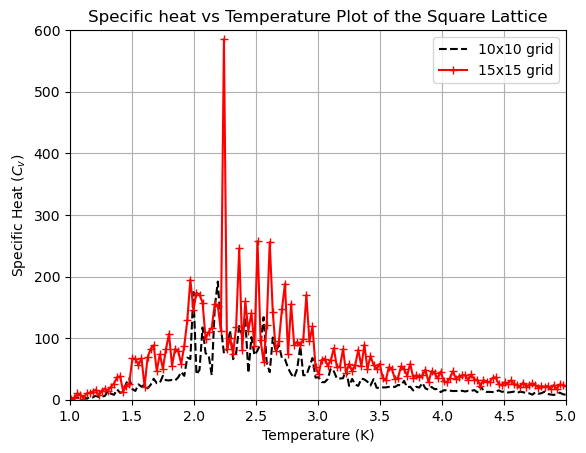

In [120]:
plt.plot(temp_range, Cv_PBC, 'k--', label='10x10 grid')
plt.plot(temp_range, Cv_PBC_1, 'r-+', label='15x15 grid')
plt.xlabel("Temperature (K)")
plt.ylabel(r"Specific Heat ($C_v$)")
plt.title("Specific heat vs Temperature Plot of the Square Lattice")
plt.ylim(0,600)
plt.xlim(1,5)
plt.grid()
plt.legend()

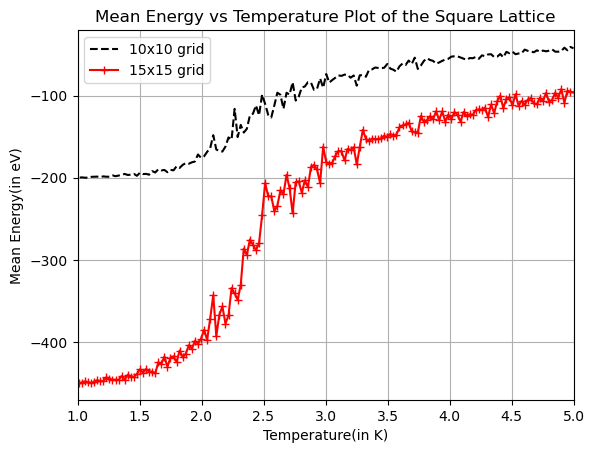

In [119]:
plt.plot(temp_range, mean_energies_PBC, 'k--', label='10x10 grid')
plt.plot(temp_range, mean_energies_PBC_1, 'r-+', label='15x15 grid')
plt.title(r"Mean Energy vs Temperature Plot of the Square Lattice")
plt.xlabel("Temperature(in K)")
plt.ylabel("Mean Energy(in eV)")
plt.xlim(1,5)
plt.legend()
plt.grid()

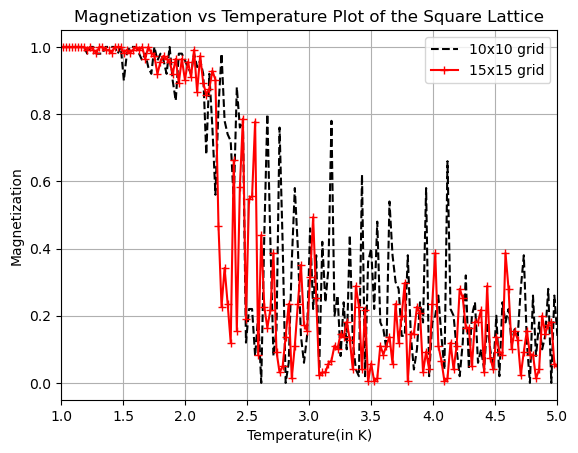

In [118]:
plt.plot(temp_range, magnetization_PBC, 'k--', label='10x10 grid')
plt.plot(temp_range, magnetization_PBC_1, 'r-+', label='15x15 grid')
plt.title(r"Magnetization vs Temperature Plot of the Square Lattice")
plt.xlabel("Temperature(in K)")
plt.ylabel("Magnetization")
plt.xlim(1,5)
plt.legend()
plt.grid()

In [123]:
X_PBC = mag_susceptibility_PBC(grid_points, temp_range)
X1_PBC = mag_susceptibility_PBC(grid_points1,temp_range)

******************************************************
****************************************************** 



Processing temperatures: 100%|██████████| 200/200 [08:20<00:00,  2.50s/temperature]


******************************************************
Magnetic susceptibility calculation completed!
****************************************************** 

******************************************************
****************************************************** 



Processing temperatures: 100%|██████████| 200/200 [18:14<00:00,  5.47s/temperature]

******************************************************
Magnetic susceptibility calculation completed!
****************************************************** 



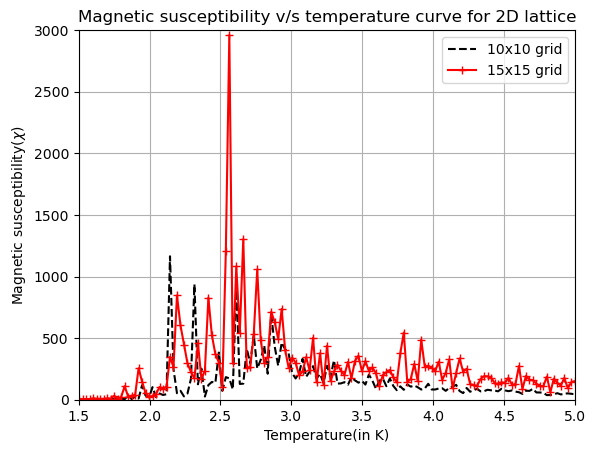

In [133]:
plt.plot(temp_range, X_PBC, 'k--', label='10x10 grid')
plt.plot(temp_range, X1_PBC, 'r-+', label='15x15 grid')
plt.xlabel("Temperature(in K)")
plt.ylabel(r"Magnetic susceptibility($\chi$)")
plt.xlim(1.5,5)
plt.ylim(0,3000)
plt.title("Magnetic susceptibility v/s temperature curve for 2D lattice")
plt.grid()
plt.legend()

## Metropolis Hasting on a Triangular lattice

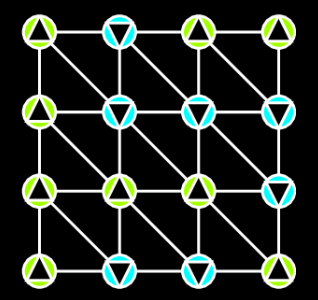

one can observe in this diagram that, one single atom is associated with 6 other atoms. Therefore, unlike a square lattice, we need to consider 6 of its nearest neighbour, up, down, left, right and left upper diagonal and right upper diagonal.

In [39]:
def grid_maker_tri(nrows,ncols):
  '''
  This function generates a random classical triangular grid of any size

  Parameters:

  - nrows: (integer) Specify the number of rows
  - ncols: (integer) Specify the number of columns

  Returns:

  The function returns your desired random grid of any size.

  '''
  if not isinstance(nrows, int) or nrows <= 0:
    raise ValueError("nrows must be a positive integer")
  if not isinstance(ncols, int) or ncols <= 0:
    raise ValueError("nrows must be a positive integer")

  grid_points = np.zeros((nrows,ncols))

  for i in range(nrows):
    for j in range(ncols):
      grid_points[i,j] = rn.choice([-1,1])

  return grid_points

In [40]:
def compute_energy_triangular(grid, mag = 'f'):
    """
    This function calculates the energy of a 2D triangular lattice with classical spins
    (Implements periodic boundary conditions).

    Parameters:
    - grid: input a 2D grid
    - mag: 'f' or 'af' to select between ferromagnetic calculation or anti-ferromagnetic calculations respectively
           (By default it is set in ferromagnetic('f') state)
    Returns:
    - Energy of the lattice
    """
    energy = 0
    nrows, ncols = grid.shape

    if mag == 'f':
        
        for k in range(nrows):
            for l in range(ncols):
                for dk, dl in [[0, -1], [0, 1], [-1, 0], [1, 0],[1,-1],[-1,1]]:
                    ni, nj = (k + dk) % nrows, (l + dl) % ncols #implementation of periodic boundary conditions
                    energy += -grid[k, l] * grid[ni, nj]

    elif mag == 'af':
        
        for k in range(nrows):
            for l in range(ncols):
                for dk, dl in [[0, -1], [0, 1], [-1, 0], [1, 0],[1,-1],[-1,1]]:
                    ni, nj = (k + dk) % nrows, (l + dl) % ncols #implementation of periodic boundary conditions
                    energy += grid[k, l] * grid[ni, nj]
    
    return energy / 2

In [41]:
def ising_model_triangular(nsamples, temperature, grid_points, mag = 'f'):
    """
    This function runs the Ising model simulation using Metropolis-Hastings for a 2D triangular lattice.
    (Implements periodic boundary condition)

    Parameters:
    - nsamples: Number of samples to be taken.
    - temperature: Temperature at which the system is simulated.
    - grid_points: Takes a grid of any size.
    - mag: 'f' or 'af' to select between ferromagnetic calculation or anti-ferromagnetic calculations respectively
           (By default it is set in ferromagnetic('f') state)

    Returns:
    - saved_energies: List of sampled energies by burning the first 20% of the sampled energies.
    - grid_points: The final grid after simulation.
    """
    if temperature <= 0:
        raise ValueError("Temperature must be positive.")

    saved_energies = []

    nrows, ncols = grid_points.shape

    for n in range(nsamples):
        i, j = np.random.randint(0, nrows), np.random.randint(0, ncols)
        temp_grid = np.copy(grid_points)
        temp_grid[i, j] = -temp_grid[i, j]

        energy = compute_energy_triangular(grid_points, mag)
        temp_energy = compute_energy_triangular(temp_grid, mag)
        energy_diff = temp_energy - energy

        p_acceptance = np.exp(-energy_diff / temperature) if temperature > 0 else 0

        if energy_diff < 0 or np.random.rand() < p_acceptance:
            grid_points[i, j] = -grid_points[i, j]
            saved_energies.append(temp_energy)
        else:
            saved_energies.append(energy)

    return saved_energies[int(nsamples/5):], grid_points


In [42]:
def specific_heat_triangular(grid, temp_range, nsamples=10000, mag = 'f'):
    """
    This function calculates and gives a list of specific heat for a lattice across a given temperature range
   (Implements periodic boundary condition)

    NOTE: Function returns 2 lists. Use 2 variables while calling the function.
    Parameters:
    - grid: Initial 2D Ising spin configuration.
    - temp_range: List of temperatures.
    - nsamples: Number of Monte Carlo samples per temperature.
    - mag: 'f' or 'af' to select between ferromagnetic calculation or anti-ferromagnetic calculations respectively
           (By default it is set in ferromagnetic('f') state)

    Returns:
    - Cv: List of specific heat values.
    - updated_Cv: Filtered Cv list without NaN values.
    """
    energy_collections = []

    print("******************************************************")
    print("Collecting energies. Kindly wait.")
    print("****************************************************** \n")

    for t in tqdm(temp_range, desc='collecting energies', unit='iterations'):
        energy, grid = ising_model_triangular(nsamples, temperature=t, grid_points=grid, mag=mag)
        energy_collections.append(energy)

    print("******************************************************")
    print("Energy collection completed! Calculating Cv now.")
    print("****************************************************** \n")

    Cv = []
    for t, energies in zip(temp_range, energy_collections):
        var_energy = np.var(energies)
        Cv.append(var_energy / (t**2))

    print("******************************************************")
    print("Cv has been calculated. Refining it to remove NaN values now.")
    print("****************************************************** \n")

    updated_Cv = [c for c in Cv if not np.isnan(c)]

    print("******************************************************")
    print("Your results are ready!")
    print("****************************************************** \n")

    return Cv, updated_Cv

In [43]:
def magnetize_triangular(grid, temp_range, nsamples=10000, mag = 'f'):
    '''
    This function calculates and gives a list of magnetization for a triangular lattice across a given temperature range
    (Implements periodic boundary condition)

    Parameters:

    - grid: Takes a 2D grid of any size
    - temp_range: Takes a list of temperature for which magnetic susceptibility is to be calculated
    - nsamples: How many times would you like to sample the configuration at a given temperature
                (default is 10000).
    - mag: 'f' or 'af' to select between ferromagnetic calculation or anti-ferromagnetic calculations respectively
           (By default it is set in ferromagnetic('f') state)
    Returns:

    - magnetization: A list of magnetization values across all temperatures.
    '''
    magnetization = []
    nrows, ncols = grid.shape
    N = nrows * ncols

    for t in tqdm(temp_range, desc='collecting magnetization', unit='temperature'):
        energy, grid = ising_model_triangular(nsamples=10000, temperature=t, grid_points=grid, mag=mag)
        magnetization.append(np.abs(np.sum(grid)) / N)

    return magnetization

In [44]:
def mag_susceptibility_triangular(grid, temp_range, mag = 'f'):
    '''
    This function calculates the magnetic susceptibility for a triangular lattice across a given temperature range.
    (Implements periodic boundary condition)
    Parameters:
    - grid: Takes a 2D grid of any size.
    - temp_range: A list of temperatures at which susceptibility is calculated.
    - mag: 'f' or 'af' to select between ferromagnetic calculation or anti-ferromagnetic calculations respectively
           (By default it is set in ferromagnetic('f') state)
    Returns:
    - A list of calculated magnetic susceptibilities.
    '''
    
    susceptibility_values = []
    
    print("******************************************************")
    print("Collecting magnetization data. Kindly wait.")
    print("****************************************************** \n")
    
    for T in tqdm(temp_range, desc="Processing temperatures", unit="temperature"):
        magnetizations = []

        for _ in range(10000):  
            energy, grid = ising_model_triangular(nsamples=1, temperature=T, grid_points=grid, mag=mag)  
            magnetization = np.sum(grid)
            magnetizations.append(magnetization)
    
        mean_M = np.mean(magnetizations)
        mean_M2 = np.mean(np.square(magnetizations))
        chi = (mean_M2 - mean_M**2) / T
        susceptibility_values.append(chi)

    print("******************************************************")
    print("Magnetic susceptibility calculation completed!")
    print("****************************************************** \n")
    return susceptibility_values    

In [45]:
def mean_energy_triangular(grid, temp_range, nsamples=10000, mag='f'):
    '''
    This function calculates and gives a list of mean energy for a 2D triangular lattice across a given temperature range
    (Implements periodic boundary conditions)

    Parameters taken:

    - grid: Takes a 2D grid of any size.
    - temp_range: Takes a list of temperatures for which mean energy is to be calculated.
    - nsamples: How many times would you like to sample the configuration at a given temperature
                (default is 10000).
    - mag: 'f' or 'af' to select between ferromagnetic calculation or anti-ferromagnetic calculations respectively
           (By default it is set in ferromagnetic('f') state)
    Returns:

    - mean_energies: A list of calculated mean energy.
    '''
    energy_collections = []
    nrows, ncols = grid.shape
    grid = grid
    print("******************************************************")
    print("Collecting energies. Kindly wait.")
    print("****************************************************** \n")

    for t in tqdm(temp_range, desc='collecting energies', unit='temperature'):
        energy, grid = ising_model_triangular(nsamples, temperature=t, grid_points=grid, mag=mag)
        energy_collections.append(energy)

    mean_energies = []

    print("******************************************************")
    print("Energy collection completed! Calculating mean energy now.")
    print("****************************************************** \n")

    for i in tqdm(energy_collections, desc='calculating mean energy', unit='energy sample'):
        mean_energies.append(np.mean(i))

    print("******************************************************")
    print("Your results are ready!")
    print("****************************************************** \n")

    return mean_energies


In [57]:
grid = grid_maker_tri(10,10)

In [58]:
temp_range = np.linspace(0.1,5,200)

In [48]:
Cv_tri, updated_Cv_tri = specific_heat_triangular(grid, temp_range, mag='af')
Cv1_tri, updated_Cv1_tri = specific_heat_triangular(grid, temp_range, mag='f')

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [11:08<00:00,  3.34s/iterations]


******************************************************
Energy collection completed! Calculating Cv now.
****************************************************** 

******************************************************
Cv has been calculated. Refining it to remove NaN values now.
****************************************************** 

******************************************************
Your results are ready!
****************************************************** 

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [11:59<00:00,  3.60s/iterations]

******************************************************
Energy collection completed! Calculating Cv now.
****************************************************** 

******************************************************
Cv has been calculated. Refining it to remove NaN values now.
****************************************************** 

******************************************************
Your results are ready!
****************************************************** 



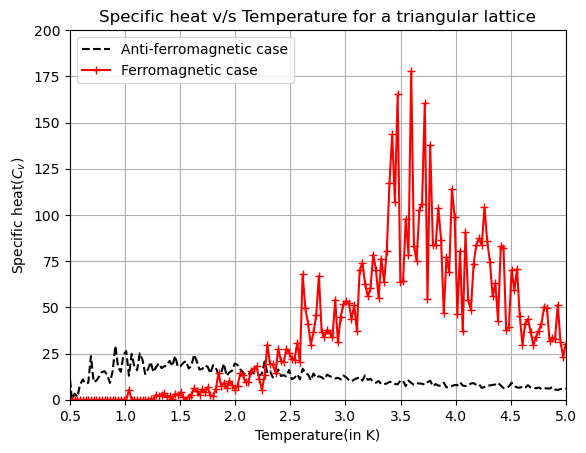

In [51]:
plt.plot(temp_range, Cv_tri, 'k--', label='Anti-ferromagnetic case')
plt.plot(temp_range, Cv1_tri, 'r+-', label='Ferromagnetic case')
plt.xlabel('Temperature(in K)')
plt.ylabel(r'Specific heat($C_v$)')
plt.title("Specific heat v/s Temperature for a triangular lattice")
plt.xlim(0.5,5)
plt.ylim(0,200)
plt.legend()
plt.grid()

In [59]:
mean_en_tri = mean_energy_triangular(grid, temp_range, mag='af')
mean_en1_tri = mean_energy_triangular(grid, temp_range, mag='f')

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [11:16<00:00,  3.38s/temperature]


******************************************************
Energy collection completed! Calculating mean energy now.
****************************************************** 



calculating mean energy: 100%|██████████| 200/200 [00:00<00:00, 3501.45energy sample/s]


******************************************************
Your results are ready!
****************************************************** 

******************************************************
****************************************************** 



collecting energies: 100%|██████████| 200/200 [11:59<00:00,  3.60s/temperature]


******************************************************
Energy collection completed! Calculating mean energy now.
****************************************************** 



calculating mean energy: 100%|██████████| 200/200 [00:00<00:00, 3292.12energy sample/s]

******************************************************
Your results are ready!
****************************************************** 



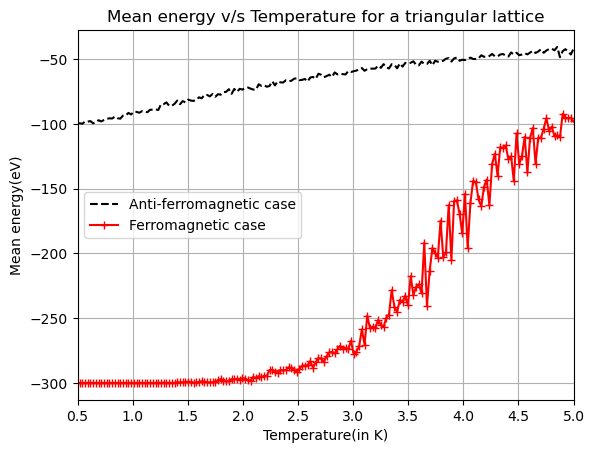

In [60]:
plt.plot(temp_range, mean_en_tri, 'k--', label='Anti-ferromagnetic case')
plt.plot(temp_range, mean_en1_tri, 'r+-', label='Ferromagnetic case')
plt.xlabel('Temperature(in K)')
plt.ylabel(r'Mean energy(eV)')
plt.title("Mean energy v/s Temperature for a triangular lattice")
plt.xlim(0.5,5)
plt.legend()
plt.grid()

In [61]:
magnetize_tri = magnetize_triangular(grid, temp_range, mag='af')
magnetize1_tri = magnetize_triangular(grid, temp_range, mag='f')

collecting magnetization: 100%|██████████| 200/200 [11:57<00:00,  3.59s/temperature]


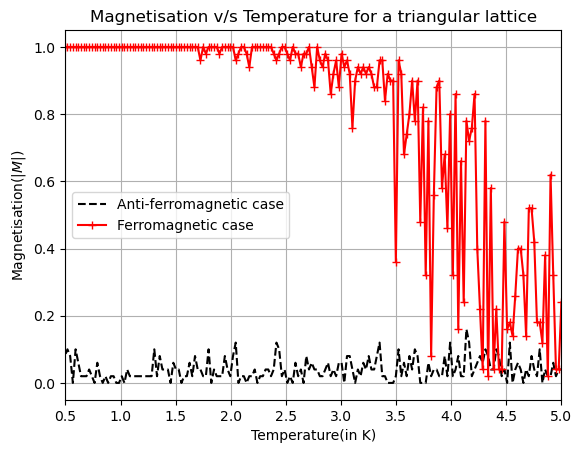

In [62]:
plt.plot(temp_range, magnetize_tri, 'k--', label='Anti-ferromagnetic case')
plt.plot(temp_range, magnetize1_tri, 'r+-', label='Ferromagnetic case')
plt.xlabel('Temperature(in K)')
plt.ylabel(r'Magnetisation($|M|$)')
plt.title("Magnetisation v/s Temperature for a triangular lattice")
plt.xlim(0.5,5)
plt.legend()
plt.grid()

In [63]:
X_tri = mag_susceptibility_triangular(grid, temp_range, mag='af')
X1_tri = mag_susceptibility_triangular(grid, temp_range, mag='f')

******************************************************
****************************************************** 



Processing temperatures: 100%|██████████| 200/200 [11:24<00:00,  3.42s/temperature]


******************************************************
Magnetic susceptibility calculation completed!
****************************************************** 

******************************************************
****************************************************** 



Processing temperatures: 100%|██████████| 200/200 [12:11<00:00,  3.66s/temperature]

******************************************************
Magnetic susceptibility calculation completed!
****************************************************** 



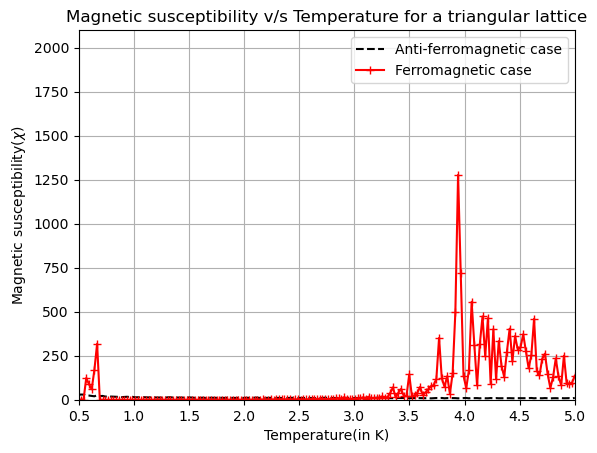

In [64]:
plt.plot(temp_range, X_tri, 'k--', label='Anti-ferromagnetic case')
plt.plot(temp_range, X1_tri, 'r+-', label='Ferromagnetic case')
plt.xlabel('Temperature(in K)')
plt.ylabel(r'Magnetic susceptibility($\chi$)')
plt.title("Magnetic susceptibility v/s Temperature for a triangular lattice")
plt.xlim(0.5,5)
plt.ylim(0,2100)
plt.legend()
plt.grid()

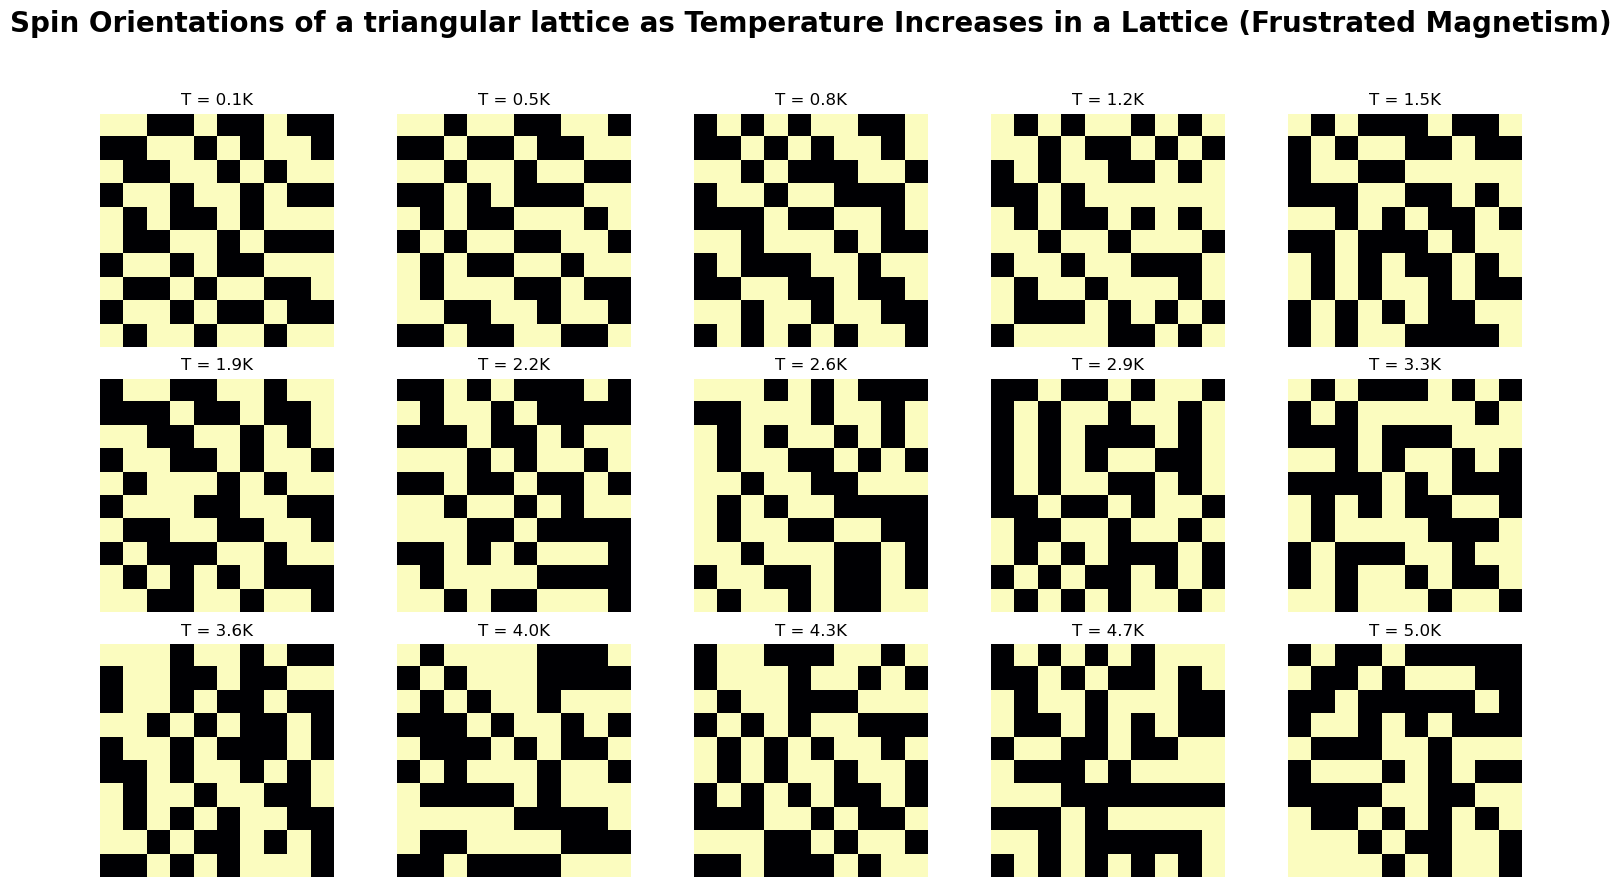

In [53]:
temp_range = np.linspace(0.1, 5, 15)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))

for idx, temp in enumerate(temp_range):
    energy, grid = ising_model_triangular(nsamples=10000, temperature=temp, grid_points=grid, mag='af')

    ax = axes[idx // 5, idx % 5]
    ax.imshow(grid, cmap="magma")
    ax.set_title(f"T = {temp:.1f}K", fontsize=12)
    ax.axis("off")

fig.suptitle("Spin Orientations of a triangular lattice as Temperature Increases in a Lattice (Frustrated Magnetism)", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In anti-ferromagnetic case, the triangular lattice shows frustrated magnetism. We can see that no matter how low we decrease the temperature, the lattice never reaches a ferromagnetic state.

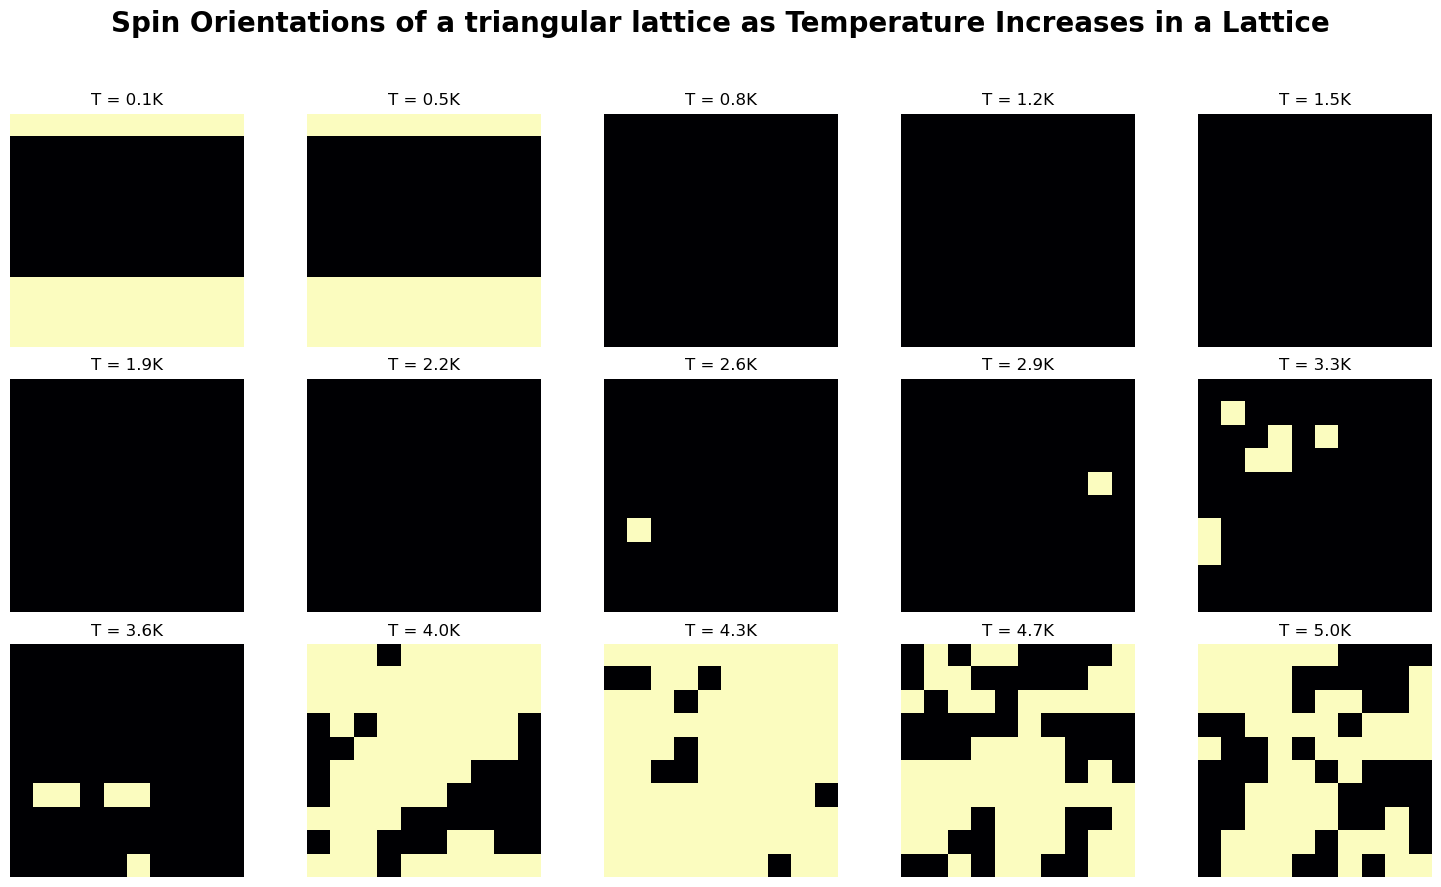

In [52]:
temp_range = np.linspace(0.1, 5, 15)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))

for idx, temp in enumerate(temp_range):
    energy, grid = ising_model_triangular(nsamples=10000, temperature=temp, grid_points=grid, mag='f')

    ax = axes[idx // 5, idx % 5]
    ax.imshow(grid, cmap="magma")
    ax.set_title(f"T = {temp:.1f}K", fontsize=12)
    ax.axis("off")

fig.suptitle("Spin Orientations of a triangular lattice as Temperature Increases in a Lattice", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
energy, grid_tri = ising_model_triangular(nsamples=10000,temperature=2,grid_points=grid, mag='af')
print(grid_tri)

[[ 0.5  0.5  0.5  0.5  0.5 -0.5  0.5  0.5 -0.5 -0.5]
 [-0.5  0.5 -0.5  0.5  0.5  0.5  0.5 -0.5  0.5  0.5]
 [-0.5 -0.5  0.5 -0.5 -0.5 -0.5  0.5  0.5 -0.5  0.5]
 [ 0.5  0.5  0.5 -0.5  0.5 -0.5 -0.5  0.5  0.5  0.5]
 [-0.5 -0.5 -0.5  0.5  0.5 -0.5 -0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5 -0.5 -0.5 -0.5  0.5  0.5  0.5 -0.5]
 [ 0.5  0.5  0.5 -0.5  0.5 -0.5 -0.5  0.5  0.5 -0.5]
 [ 0.5 -0.5  0.5  0.5  0.5 -0.5  0.5 -0.5 -0.5  0.5]
 [-0.5 -0.5 -0.5 -0.5  0.5  0.5  0.5 -0.5  0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5 -0.5  0.5 -0.5 -0.5  0.5  0.5]]
